In [1]:
import numpy as np
from causalimpact import CausalImpact
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
#average compliance for each person for semester 1 and then second semester then get the difference run the regression on that difference

In [2]:
df = pd.DataFrame(pd.read_pickle('compliance.pkl'))
df2 = pd.DataFrame(pd.read_pickle('survey.pkl'))

df = df.merge(df2[['id']], right_on = 'id', left_on = 'id')

In [3]:
dfAvg = df.groupby('date').compliance.mean()

In [4]:
dfAvg.head()

date
2015-07-24    25.888889
2015-07-25    60.791667
2015-07-26    70.757576
2015-07-27    79.232558
2015-07-28    76.121212
Name: compliance, dtype: float64

In [5]:
dfAvg = dfAvg['2015-07-27':'2019-02-01']

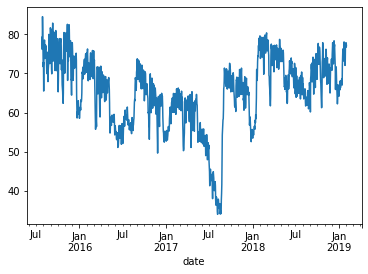

In [6]:
dfAvg.plot(label = 'Average')

In [7]:
dfAvg = dfAvg.to_frame()


In [8]:
dfAvg['Drop']= np.nan

In [9]:

dfWknd = pd.DataFrame(columns = ['Wknd'])



In [10]:
i=1

weekendSum = 0
drop = 0
weekSum = 0
weekAvg = 0
weekendAvg = 0
start = ''
for index, values in dfAvg.iterrows():
    if(i == 7):
        weekendSum= weekendSum + dfAvg.loc[index:index]['compliance'][0]
        weekendAvg = weekendSum/2
        new = {'Wknd':weekendAvg}
        dfWknd = dfWknd.append(new, ignore_index=True)
        weekAvg = weekSum/5
        drop = weekAvg -weekendAvg
        
        dfAvg.loc[start:index]['Drop'] = drop
        weekendSum = 0
        drop = 0
        weekSum = 0
        weekAvg = 0
        weekendAvg = 0
        i=0
        
        
    elif(i==1):
        start = index
        weekSum = weekSum + dfAvg.loc[index:index,'compliance'][0]
    elif(i==6):
        weekendSum = weekendSum + dfAvg.loc[index:index,'compliance'][0]
    else:
        weekSum = weekSum + dfAvg.loc[index:index,'compliance'][0]
    i=i+1
    
        
   

C:\python\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


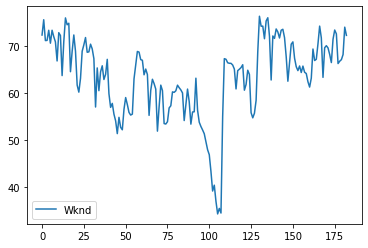

In [11]:
dfWknd.plot()

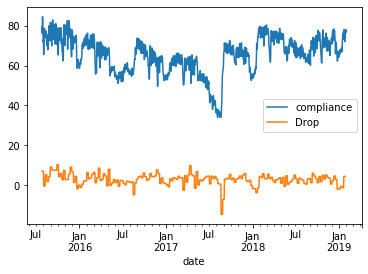

In [12]:
dfAvg.plot()

In [13]:
dfAvg.loc['2017-08-28':'2018-12-30',"Post"]=1
dfAvg.loc['2015-07-27':'2017-08-01',"Pre"]=1
dfAvg.loc['2015-07-27':'2017-08-01',"Post"]=0
dfAvg.loc['2017-08-28':'2018-02-01',"Pre"]=0

In [14]:
dfAvgWknd = pd.concat([dfAvg.loc['2015-09-07':'2015-12-13'],dfAvg.loc['2016-01-24':'2016-04-24'],
                       dfAvg.loc['2016-09-05':'2016-12-11'],dfAvg.loc['2017-01-29':'2017-04-30'],
                       dfAvg.loc['2017-09-04':'2017-12-10'],dfAvg.loc['2018-01-28':'2018-04-29'],
                       dfAvg.loc['2018-09-03':'2018-12-09'],dfAvg.loc['2019-01-27':'2019-02-01']
                      ])



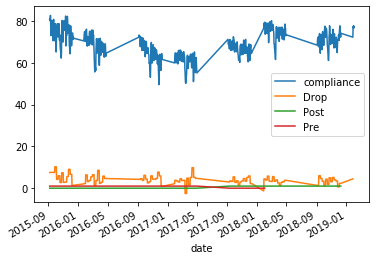

In [15]:
dfAvgWknd.plot()

In [16]:
post = dfAvgWknd[dfAvgWknd["Post"]==1].Drop

In [17]:
pre = dfAvgWknd[dfAvgWknd["Pre"]==1].Drop

In [18]:
print('Pre new fitbits:' + str(pre.mean())) 
print('Post new fitbits:' + str(post.mean())) 



Pre new fitbits:4.642028899203864
Post new fitbits:3.4901755267753996


In [19]:
ttest_ind(pre,post)

Ttest_indResult(statistic=7.426524471202463, pvalue=3.423568350554202e-13)

In [20]:
dfAvgBreaks = pd.DataFrame(columns = ['Summer','Winter' ])

In [21]:
winter1 = dfAvg.loc['2015-08-24':'2015-12-13'].compliance.mean() - dfAvg.loc['2015-12-14':'2016-01-10'].compliance.mean()

In [22]:
summer1 = dfAvg.loc['2016-01-11':'2016-05-01'].compliance.mean() - dfAvg.loc['2016-05-02':'2016-08-21'].compliance.mean()

In [23]:
winter2 = dfAvg.loc['2016-08-22':'2016-12-11'].compliance.mean() - dfAvg.loc['2016-12-12':'2017-01-15'].compliance.mean()

In [24]:
summer2 = dfAvg.loc['2017-01-12':'2017-05-07'].compliance.mean() - dfAvg.loc['2017-05-08':'2017-08-20'].compliance.mean()

In [25]:
winter3 = dfAvg.loc['2017-08-21':'2017-12-10'].compliance.mean() - dfAvg.loc['2017-12-11':'2018-01-14'].compliance.mean()

In [26]:
summer3 = dfAvg.loc['2018-01-15':'2018-05-06'].compliance.mean() - dfAvg.loc['2018-05-07':'2018-08-19'].compliance.mean()

In [27]:
winter4 = dfAvg.loc['2018-08-20':'2018-12-09'].compliance.mean() - dfAvg.loc['2018-12-10':'2019-01-12'].compliance.mean()

In [28]:
dfAvgBreaks["Summer"] = [summer1,summer2,summer3,0]
dfAvgBreaks['Winter']= [winter1,winter2,winter3,winter4]

In [29]:
dfAvgBreaks.head()

,Summer,Winter
0,11.824253,11.544795
1,13.882304,9.243791
2,6.463393,7.734851
3,0.000000,2.237289
